# Mnist data set

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh


## loading Dataset

In [47]:
df = pd.read_csv('mnist.csv')

## Exploring Data shape

In [63]:
df.shape

(42000, 785)

In [64]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
x = df.iloc[:,1:]
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
y = df.iloc[:,0]
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

# visulaizing Digits

Text(0.5, 1.0, '0')

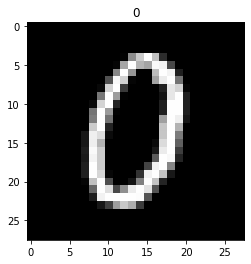

In [71]:
i=5
img=x.iloc[i].to_numpy()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y.iloc[i])

# Principle Component Analysis:


### Steps:

### 1- Standerdization of data 

    Standardize the range of data so that each one of them contributes equally in the analysis.
    PCA is sensitive to data variation so a variable with larger ranges will dominate over variables with small ranges, which leads to biased results.

In [72]:
standardized_scalar = StandardScaler()
standardized_data = standardized_scalar.fit_transform(x)
standardized_data.shape

(42000, 784)

## 2- Calculating Covariance matrix 

    Original matrix (A) is 42000 x 784 
    (A^T) is 784x42000 
    covarience_matrix = (A^T) * (A), So we get a matrix dim of 784x784

In [73]:
cov_matrix = np.matmul(standardized_data.T, standardized_data)
cov_matrix.shape


(784, 784)

## 3- Calculating eigen values and eigen vectors

### Selecting the greatest eigen values as they represent the greatest contribution in the data 

In [74]:
values,vectors = eigh(cov_matrix, eigvals=(782, 783))

In [75]:
vectors

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [76]:
vectors = vectors.T
vectors.shape
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 4- Calculating Final dataset

In [77]:
new_coordinates = np.matmul(vectors, standardized_data.T)
new_coordinates

array([[-5.2264454 ,  6.03299601, -1.70581328, ...,  7.07627667,
        -4.34451279,  1.55912058],
       [-5.14047772, 19.29233234, -7.64450341, ...,  0.49539137,
         2.30724011, -4.80767022]])

In [78]:
new_coordinates = np.vstack((new_coordinates, y)).T
new_coordinates

array([[-5.2264454 , -5.14047772,  1.        ],
       [ 6.03299601, 19.29233234,  0.        ],
       [-1.70581328, -7.64450341,  1.        ],
       ...,
       [ 7.07627667,  0.49539137,  7.        ],
       [-4.34451279,  2.30724011,  6.        ],
       [ 1.55912058, -4.80767022,  9.        ]])

In [79]:
df_new = pd.DataFrame(new_coordinates, columns=["C1", "C2", "labels"])
df_new.head()

,C1,C2,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


## Visualizing data in only 2D

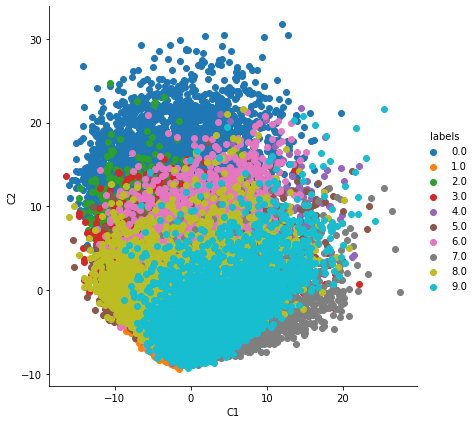

In [80]:
sns.FacetGrid(df_new, hue="labels", height=6).map(plt.scatter, "C1", "C2").add_legend()
plt.show()


### Notice the overlap of the data, so we didn't get too much information of it,from which we conclude that PCA is not the best model to go with from 784 to 2D